In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px


In [2]:
df = pd.read_csv('/home/user/anaconda3/Computer Vision/disease-prediction/data/dataset.csv')
severity_df = pd.read_csv('/home/user/anaconda3/Computer Vision/disease-prediction/data/Symptom-severity.csv')
precaution_df = pd.read_csv('/home/user/anaconda3/Computer Vision/disease-prediction/data/symptom_precaution.csv')
df.fillna("None", inplace=True)


In [3]:
print(df.head())
print(df.info())
print(df['Disease'].value_counts())
print(df['Disease'].unique())

            Disease   Symptom_1              Symptom_2              Symptom_3  \
0  Fungal infection     itching              skin_rash   nodal_skin_eruptions   
1  Fungal infection   skin_rash   nodal_skin_eruptions    dischromic _patches   
2  Fungal infection     itching   nodal_skin_eruptions    dischromic _patches   
3  Fungal infection     itching              skin_rash    dischromic _patches   
4  Fungal infection     itching              skin_rash   nodal_skin_eruptions   

              Symptom_4 Symptom_5 Symptom_6 Symptom_7 Symptom_8 Symptom_9  \
0   dischromic _patches      None      None      None      None      None   
1                  None      None      None      None      None      None   
2                  None      None      None      None      None      None   
3                  None      None      None      None      None      None   
4                  None      None      None      None      None      None   

  Symptom_10 Symptom_11 Symptom_12 Symptom_13 Symp

In [11]:
unique_diseases = df['Disease'].unique()
print(unique_diseases)
count_diseases = df['Disease'].value_counts()
print(count_diseases)


['Fungal infection' 'Allergy' 'GERD' 'Chronic cholestasis' 'Drug Reaction'
 'Peptic ulcer diseae' 'AIDS' 'Diabetes ' 'Gastroenteritis'
 'Bronchial Asthma' 'Hypertension ' 'Migraine' 'Cervical spondylosis'
 'Paralysis (brain hemorrhage)' 'Jaundice' 'Malaria' 'Chicken pox'
 'Dengue' 'Typhoid' 'hepatitis A' 'Hepatitis B' 'Hepatitis C'
 'Hepatitis D' 'Hepatitis E' 'Alcoholic hepatitis' 'Tuberculosis'
 'Common Cold' 'Pneumonia' 'Dimorphic hemmorhoids(piles)' 'Heart attack'
 'Varicose veins' 'Hypothyroidism' 'Hyperthyroidism' 'Hypoglycemia'
 'Osteoarthristis' 'Arthritis' '(vertigo) Paroymsal  Positional Vertigo'
 'Acne' 'Urinary tract infection' 'Psoriasis' 'Impetigo']
Disease
Fungal infection                           120
Allergy                                    120
GERD                                       120
Chronic cholestasis                        120
Drug Reaction                              120
Peptic ulcer diseae                        120
AIDS                                  

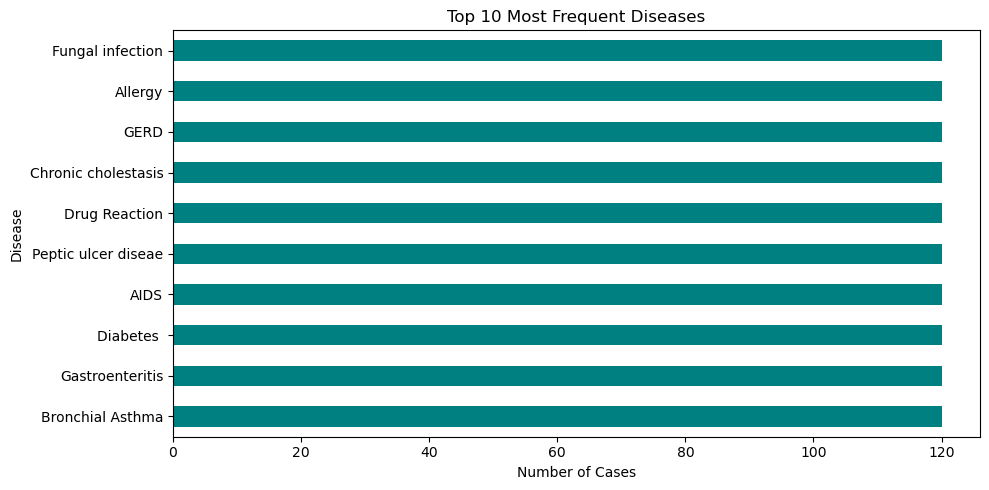

In [4]:
plt.figure(figsize=(10,5))
df['Disease'].value_counts().head(10).plot(kind='barh', color='teal')
plt.title('Top 10 Most Frequent Diseases')
plt.xlabel('Number of Cases')
plt.ylabel('Disease')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


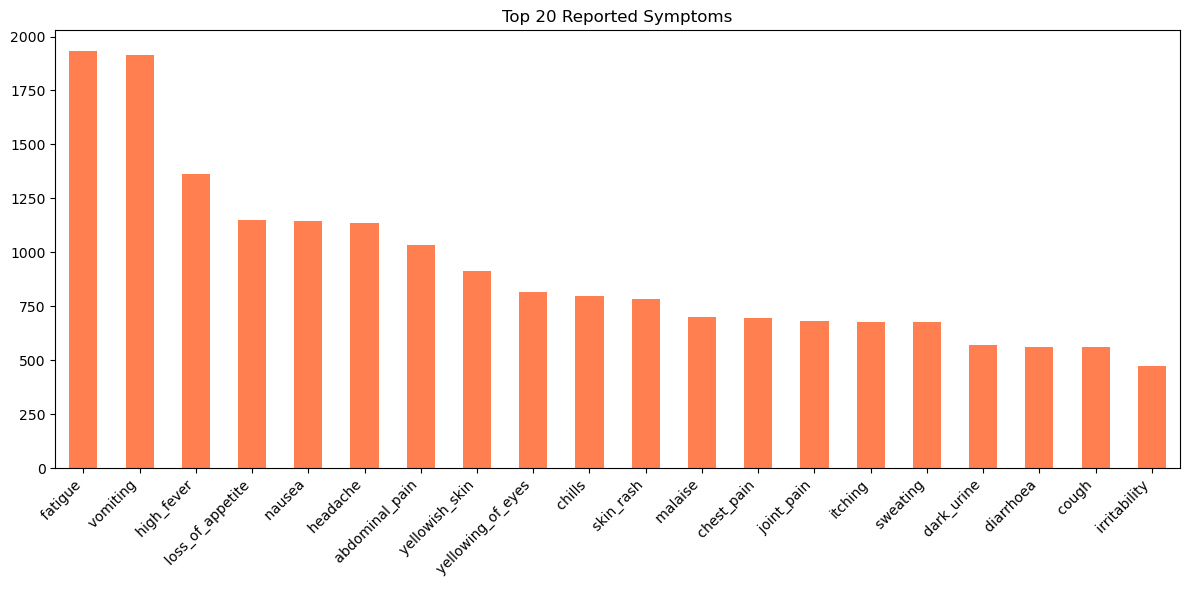

In [5]:
symptom_cols = [col for col in df.columns if col.startswith("Symptom_")]
symptoms_flat = pd.Series(df[symptom_cols].values.ravel())
symptoms_flat = symptoms_flat[symptoms_flat != "None"]

plt.figure(figsize=(12,6))
symptoms_flat.value_counts().head(20).plot(kind='bar', color='coral')
plt.title('Top 20 Reported Symptoms')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


/tmp/ipykernel_44789/3961985996.py:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




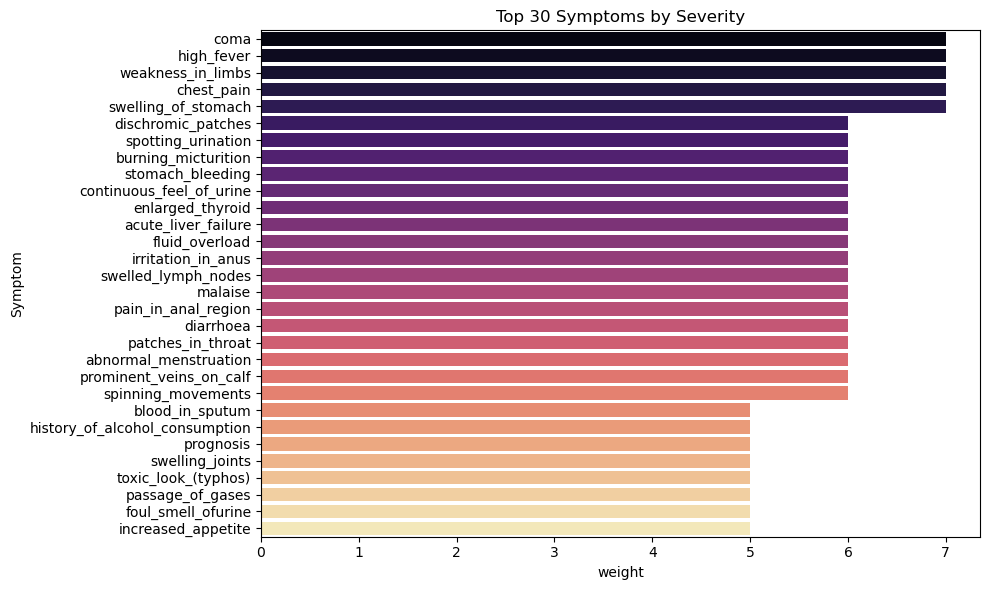

In [14]:
top_n = 30  # Adjust this number as needed
plt.figure(figsize=(10, 6))
sns.barplot(
    data=severity_df_sorted.head(top_n),
    y='Symptom',
    x='weight',
    palette='magma'
)
plt.title(f'Top {top_n} Symptoms by Severity')
plt.tight_layout()
plt.show()



In [13]:
import plotly.express as px

fig = px.bar(
    severity_df_sorted.head(30),
    x='weight',
    y='Symptom',
    orientation='h',
    title='Top 30 Symptoms by Severity',
    color='weight',
    color_continuous_scale='magma'
)
fig.update_layout(yaxis={'categoryorder': 'total ascending'})
fig.show()


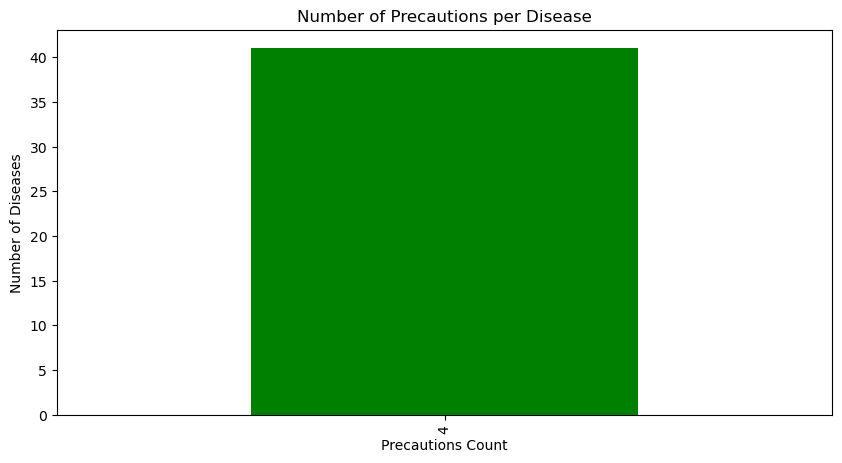

In [7]:
precaution_counts = precaution_df.drop(columns=["Disease"]).apply(lambda x: x != '', axis=1).sum(axis=1)
precaution_df['Precaution Count'] = precaution_counts

plt.figure(figsize=(10,5))
precaution_df['Precaution Count'].value_counts().sort_index().plot(kind='bar', color='green')
plt.title('Number of Precautions per Disease')
plt.xlabel('Precautions Count')
plt.ylabel('Number of Diseases')
plt.show()


In [9]:
fig = px.histogram(df, x='Disease', title='Disease Distribution')
fig.update_layout(xaxis={'categoryorder':'total descending'})
fig.show()
